# Example to run inversion using box model
The inversion estimates the emissions deviation from some a priori value

In [1]:
from py12box_invert import core, utils
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
project_path = Path("/home/lw13938/work/py12box_invert/data/example")
species = "CFC-11"
case = "CFC-11"

This runs the inversion to estimate yearly emissions different to a priori for each box

In [3]:
model_emissions, model_mf = core.run_inversion(project_path, species, ic0=np.array([253,253,253,253]))

  1%|          | 2/348 [00:00<00:32, 10.53it/s]

Running model. This may be slow for the first run...
... done in 0.024480581283569336 s


100%|██████████| 348/348 [00:33<00:00, 10.25it/s]


Prior emissions uncertainty defaulting to 100 Gg/box/yr


/home/lw13938/work/py12box_invert/py12box_invert/core.py:228: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xmf_N_Cov = xmf_Cov[np.meshgrid(N_ind,N_ind)]
/home/lw13938/work/py12box_invert/py12box_invert/core.py:229: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xmf_S_Cov = xmf_Cov[np.meshgrid(N_ind,N_ind)]


Plot the results

Text(0, 0.5, 'Emissions Gg/yr')

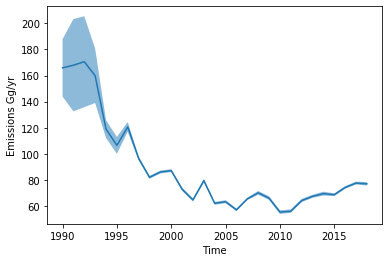

In [6]:
plt.plot(model_emissions.index, model_emissions.Global_emissions)
plt.fill_between(model_emissions.index, model_emissions.Global_emissions-model_emissions.Global_emissions_sd, \
                 model_emissions.Global_emissions+model_emissions.Global_emissions_sd, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Emissions Gg/yr")

Plot modelled mole fraction

Text(0, 0.5, 'ppt')

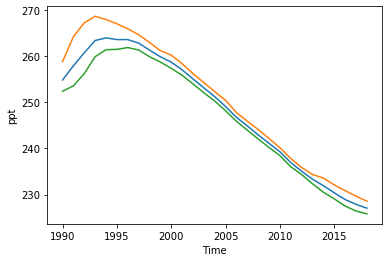

In [5]:
plt.plot(model_mf.index, model_mf.Global_mf)
plt.plot(model_mf.index, model_mf.N_mf)
plt.plot(model_mf.index, model_mf.S_mf)
plt.xlabel("Time")
plt.ylabel("ppt")